<a href="https://colab.research.google.com/github/edojatheophilus/AI-vs-Human-Text-Detection/blob/Development/AI_human_txt_NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Don't run below code 🛑
# **start after load pickle file ⬇:**

# **01. DATA PREPARATION**


## **a. Load the dataset, Explore the dataset to understand its structure and contents**

In [ ]:
# Importing necessary libraries
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical computations
import re                          # For regular expressions
import nltk                        # Natural Language Toolkit
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  # Stopwords
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer  # Lemmatization
import spacy                       # Advanced NLP library
from spacy.lang.en import English
#from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload your Kaggle API token (kaggle.json)
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!kaggle datasets download -d shanegerami/ai-vs-human-text


Saving kaggle.json to kaggle.json
 99% 345M/350M [00:10<00:00, 29.7MB/s]
100% 350M/350M [00:10<00:00, 33.8MB/s]


In [ ]:
!unzip ai-vs-human-text.zip

Archive:  ai-vs-human-text.zip
  inflating: AI_Human.csv            


In [ ]:
#load the dataset
df = pd.read_csv('AI_Human.csv')

In [ ]:
#df1 = pd.read_csv('/content/AI_Human.csv')

In [ ]:
#Display the first 5 rows of the DataFrame
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [ ]:
# Display the last 5 rows of the DataFrame
df.tail()

,text,generated
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0
487234,"Richard Non, Jimmy Carter, and Bob Dole and ot...",0.0


In [ ]:
#dataset shape
df.shape

(487235, 2)

In [ ]:
# information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


<Axes: xlabel='generated', ylabel='count'>

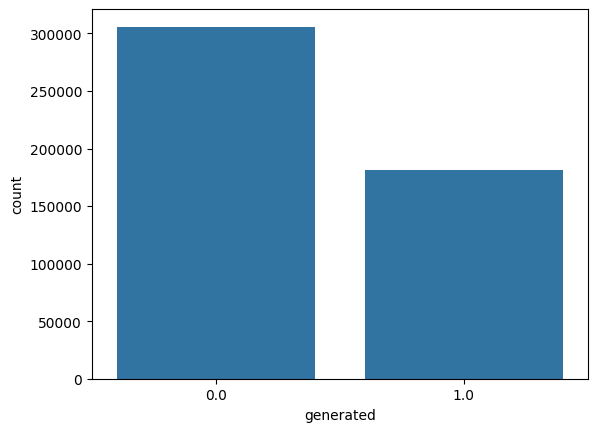

In [ ]:
# distribution of categories in the 'generated' column of the DataFrame
sns.countplot(data=df,x='generated')

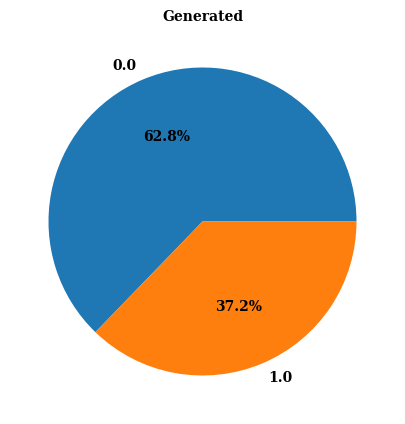

In [ ]:
# percentage of categories in the 'generated' column of the DataFrame
plt.figure(figsize=(15,5))
plt.pie(df['generated'].value_counts(), labels=df['generated'].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Generated', size=10, **hfont)
plt.show()

In [ ]:
#  counts of total texts, human-written texts, and AI-generated texts in the 'generated' column of the DataFrame
total_text_count = df['generated'].count()
human_written_txt_count = (df['generated'] == 0.0).sum()
ai_generated_txt_count = (df['generated'] == 1.0).sum()
print('Total Texts:', total_text_count)
print('Human Written Texts:', human_written_txt_count )
print('AI Generated Texts:', ai_generated_txt_count )


Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


In [ ]:
#take a sample data from dataset
df_zeros = df[df['generated'] == 0].head(10000)
df_ones = df[df['generated'] == 1].head(10000)

In [ ]:
new_df = pd.concat([df_zeros, df_ones], ignore_index=True)

In [ ]:
df_new = new_df.copy()

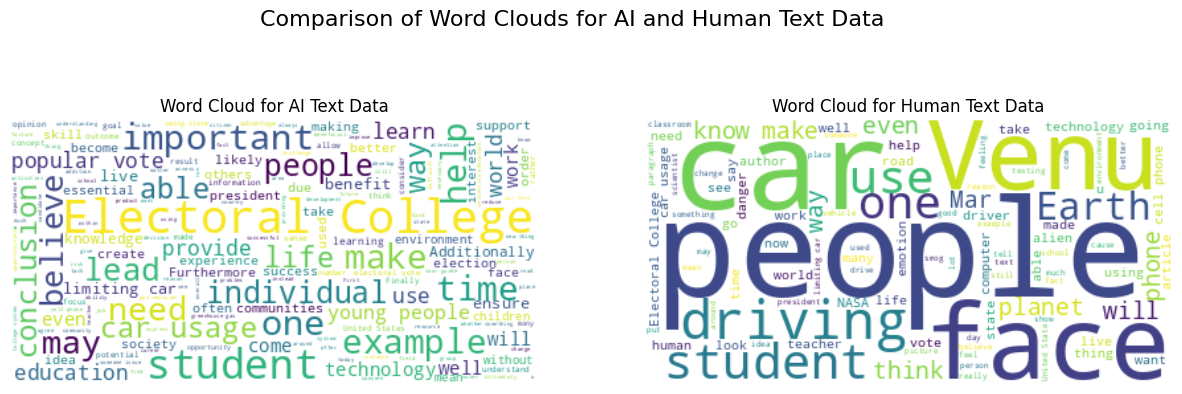

In [ ]:
#Comparison of Word clouds for AI and Human text Data

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Separate data for AI-generated and human-generated text
ai_text_data = ' '.join(df_new[df_new['generated'] == 1]['text'])
human_text_data = ' '.join(df_new[df_new['generated'] == 0]['text'])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot Word Cloud for AI-generated text
if ai_text_data:
    wordcloud_ai = WordCloud(background_color='white').generate(ai_text_data)
    axs[0].imshow(wordcloud_ai, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title('Word Cloud for AI Text Data')

# Plot Word Cloud for human-generated text
if human_text_data:
    wordcloud_human = WordCloud(background_color='white').generate(human_text_data)
    axs[1].imshow(wordcloud_human, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title('Word Cloud for Human Text Data')

plt.suptitle('Comparison of Word Clouds for AI and Human Text Data', fontsize=16)
plt.show()


# **02. DATA CLEANING AND PERFORM PREPROCESSING**

In [ ]:
#count of null value rows
num_null_rows = df.isnull().sum()
print("Number of Duplicate Rows:", num_null_rows)

Number of Duplicate Rows: text         0
generated    0
dtype: int64


In [ ]:
# Count of duplicate rows
num_duplicate_rows = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicate_rows)


Number of Duplicate Rows: 0


# ***Remove List of tags  (newline characters and single quotes)***

In [ ]:
# examining the text content of the first row in the 'text' column- human written text
df['text'][1]

'Transportation is a large necessity in most countries worldwide. With no doubt, cars, buses, and other means of transportation make going from place to place easier and faster. However there\'s always a negative pollution. Although mobile transportation are a huge part of daily lives, we are endangering the Earth with harmful greenhouse gases, which could be suppressed.\n\nA small suburb community in Germany called Vauban, has started a "carfree" lifestyle. In this city, markets and stores are placed nearby homes, instead of being located by farend highways. Although Vauban is not completely carfree, 70% of Vauban families do not own cars Even a large 57% of families stated to have sold their cars to move to Vauban. Some families have even said to be less stressed depending on car transportation. Cars are responsible for about 12% of greenhouse gases, and can even be up to 50% in some carintensive areas in the United States.\n\nAnother insight to reduced car zones brings Paris\' incid

In [ ]:
# examining the text content of the last row in the 'text' column- AI generated text
df['text'][487234]

'Richard Non, Jimmy Carter, and Bob Dole and other companies have all agreed to abolish the Electoral College and I to agree Xor many reasons. One ox the major issue is that the voters don\'t know what really happens to their vote. Another issue to add is that \'\'the electoral collage is unfair, outdated, and irrational".\n\nDo the citizens that go and vote Xor their candidate actually choose Xor the candidate\'s electors? In the text is states that not only do I vote Xor candidate\'s electors but also \'\' help choose the state\'s electors when you vote Xor the president\'\'. This meaning that my vote counts Xor several things, but was I aware? Maybe not because I simply think I\'m voting Xor a candidate running Xor president not the candidate\'s elector. The Electoral College was meet Xor a compromise between Congress and Citizens not all these extra people.\n\n\'\'This year voters can expect another close election in which the popular vote winner could lose again\'\'. Certainly thi

In [ ]:
df_1 = df.copy()  ## Create a copy of the original DataFrame

In [ ]:
# Define a function to remove specific tags from text

def remove_tags(text):
    # List of tags to remove (newline characters and single quotes)
    tags_to_remove = ['\n', '\'']

    # Iterate through the tags and replace them with an empty string
    for tag in tags_to_remove:
        if tag == '\n':
            text = text.replace(tag, ' ')
        else:
            text = text.replace(tag, '')

    return text

# Apply the remove_tags function to the 'text' column of the DataFrame
# This line iterates over all rows in the 'text' column and removes the specified tags
df_1['text'] = df_1['text'].apply(remove_tags)


In [ ]:
#verify the change applied
df_1['text'][1]

'Transportation is a large necessity in most countries worldwide. With no doubt, cars, buses, and other means of transportation make going from place to place easier and faster. However theres always a negative pollution. Although mobile transportation are a huge part of daily lives, we are endangering the Earth with harmful greenhouse gases, which could be suppressed.  A small suburb community in Germany called Vauban, has started a "carfree" lifestyle. In this city, markets and stores are placed nearby homes, instead of being located by farend highways. Although Vauban is not completely carfree, 70% of Vauban families do not own cars Even a large 57% of families stated to have sold their cars to move to Vauban. Some families have even said to be less stressed depending on car transportation. Cars are responsible for about 12% of greenhouse gases, and can even be up to 50% in some carintensive areas in the United States.  Another insight to reduced car zones brings Paris incident with

In [ ]:
df_1['text'][487234]

'Richard Non, Jimmy Carter, and Bob Dole and other companies have all agreed to abolish the Electoral College and I to agree Xor many reasons. One ox the major issue is that the voters dont know what really happens to their vote. Another issue to add is that the electoral collage is unfair, outdated, and irrational".  Do the citizens that go and vote Xor their candidate actually choose Xor the candidates electors? In the text is states that not only do I vote Xor candidates electors but also  help choose the states electors when you vote Xor the president. This meaning that my vote counts Xor several things, but was I aware? Maybe not because I simply think Im voting Xor a candidate running Xor president not the candidates elector. The Electoral College was meet Xor a compromise between Congress and Citizens not all these extra people.  This year voters can expect another close election in which the popular vote winner could lose again. Certainly this doesnt make since because how coul

# ***Count of punctuation marks***

In [ ]:
import string
from nltk.tokenize import word_tokenize

def count_punctuation_marks(text):
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    return punctuation_count

# Create new columns for punctuation and linking words count
df_1['punctuation_count'] = df_1['text'].apply(count_punctuation_marks)



***Visualize Comparison of punctuation count Distribution for AI-Generated and Human-Written Text***

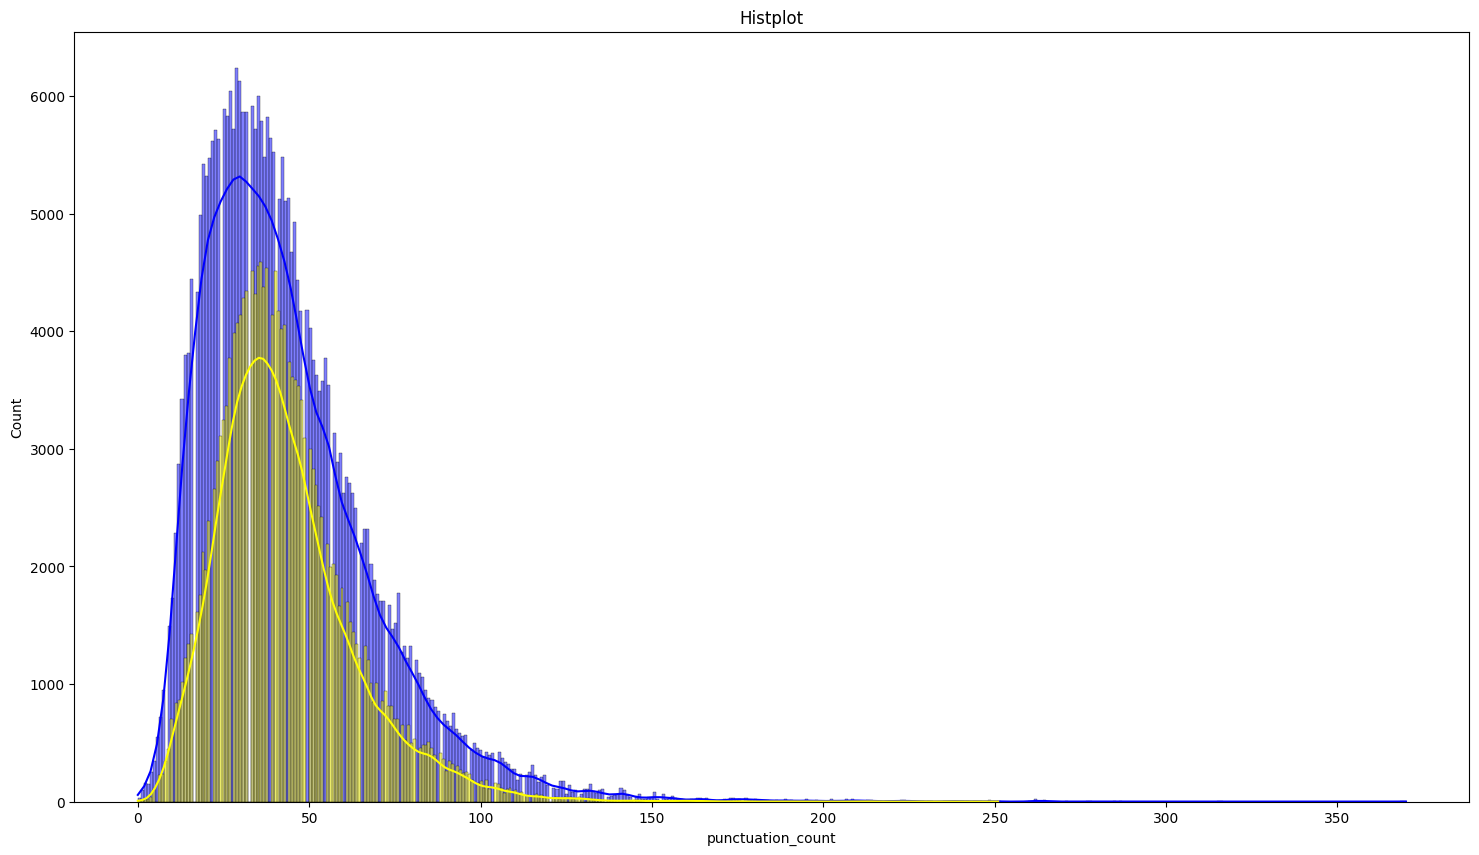

In [ ]:
# Extracting data
human_txt_Punctuation_count = df_1[df_1['generated'] == 0]['punctuation_count']
ai_txt_Punctuation_count = df_1[df_1['generated'] == 1]['punctuation_count']

# Create plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plotting histplot for punctuation count distribution
sns.histplot(human_txt_Punctuation_count, kde=True, color='blue', label='Human', ax=ax)
sns.histplot(ai_txt_Punctuation_count, kde=True, color='yellow', label='AI', ax=ax)
ax.set_title('Histplot')

plt.show()


# ***Linking words count***

In [ ]:
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

# Initialize Porter Stemmer and set of stopwords
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define additional linking words
additional_linking_words = {'to', 'the', 'and', 'of', 'in', 'on', 'for', 'with', 'at', 'a', 'an'}

# Combine stopwords and additional linking words
linking_words = stop_words.union(additional_linking_words)

def count_linking_words(text):
    # Tokenize the text and count the number of linking words
    linking_words_count = sum(1 for word in word_tokenize(text.lower()) if word in linking_words)
    return linking_words_count

df_1['linking_words_count'] = df_1['text'].apply(count_linking_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


***Visualize Comparison of linking words count Distribution for AI-Generated and Human-Written Text***

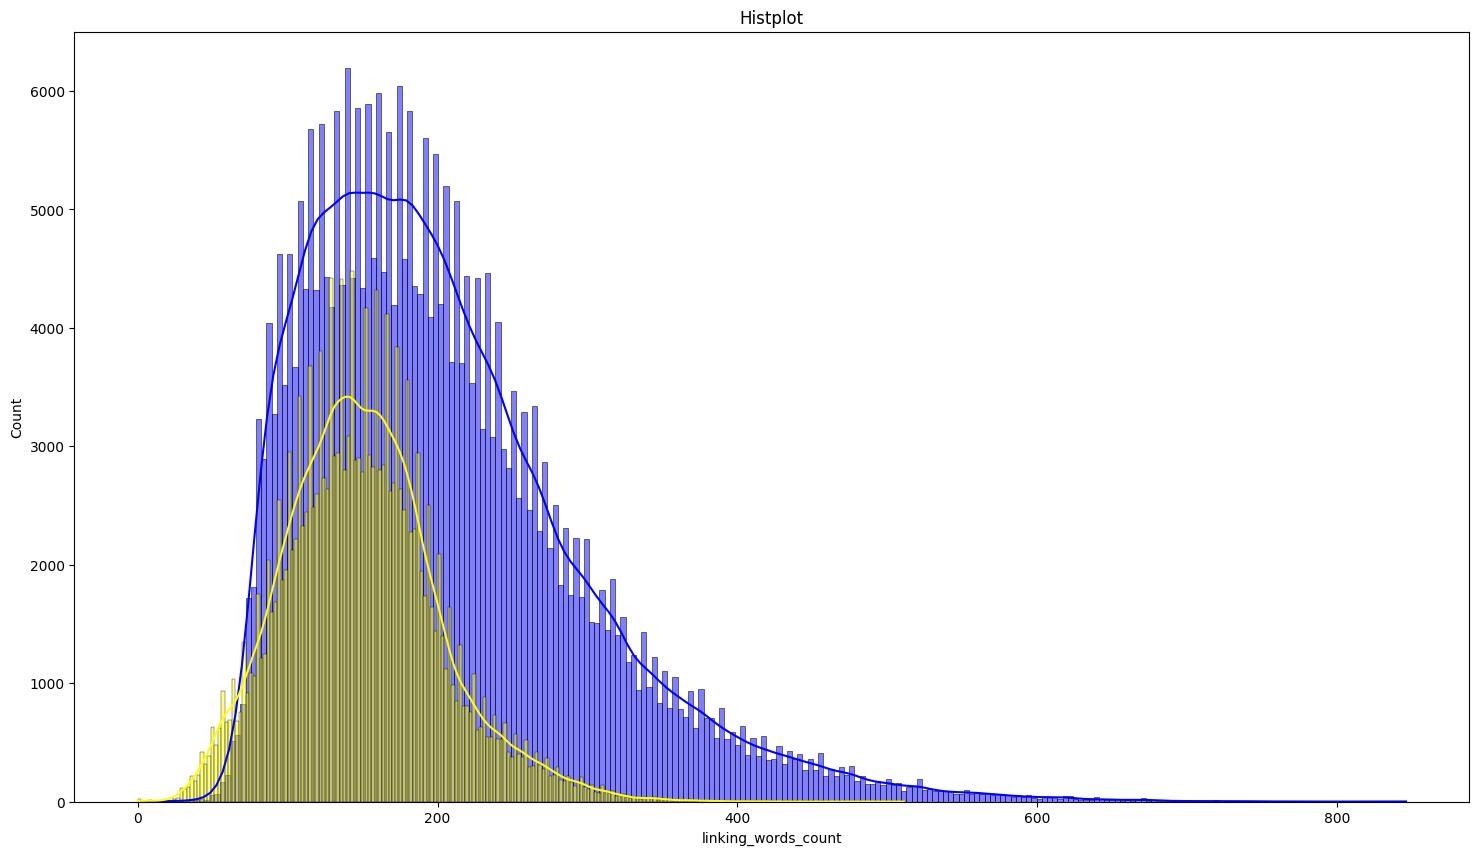

In [ ]:
# Extracting data
human_txt_linking_words_count = df_1[df_1['generated'] == 0]['linking_words_count']
ai_txt_linking_words_count = df_1[df_1['generated'] == 1]['linking_words_count']

# Create plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plotting histplot for punctuation count distribution
sns.histplot(human_txt_linking_words_count, kde=True, color='blue', label='Human', ax=ax)
sns.histplot(ai_txt_linking_words_count, kde=True, color='yellow', label='AI', ax=ax)
ax.set_title('Histplot')

plt.show()


In [ ]:
import pickle

# Save the processed DataFrame df_1 and selected columns to a pickle file
selected_columns = ['punctuation_count', 'linking_words_count']

processed_data = {
    'df_p_1': df_1[selected_columns]
}

with open('processed_data_1.pkl', 'wb') as f:
    pickle.dump(processed_data, f)


# ***Take the word count***

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Function to count word occurrences in each text
def count_word_occurrences(text):
    tokens = word_tokenize(text.lower())
    word_counts = Counter(tokens)
    return sum(word_counts.values())

# Create a new column 'word_count' for the total word count in each text
df_1['word_count'] = df_1['text'].apply(count_word_occurrences)

In [ ]:
import pickle

# Save the processed DataFrame df_1 and selected columns to a pickle file
selected_columns_2 = ['word_count']

processed_data = {
    'df_p_2': df_1[selected_columns_2]
}

with open('processed_data_2.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

# ***Finding the length of each text***

In [ ]:
from nltk.tokenize import word_tokenize

# Function to calculate text length
def lengthText(text):
    tokens = word_tokenize(text.lower())
    return len(tokens)

# Calculate text length for each text
df_1['length_text'] = df_1['text'].apply(lengthText)


# ***Comparison of Text Length Distribution for AI-Generated and Human-Written Text***

In [ ]:
human_txt_lengths = df_1[df_1['generated'] == 0]['length_text']
ai_txt_lengths = df_1[df_1['generated'] == 1]['length_text']

<ipython-input-87-fbbea953f86c>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(human_txt_lengths, kde=True, color='blue', label='Human', ax=axes[1, 2])
<ipython-input-87-fbbea953f86c>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ai_txt_lengths, kde=True, color='orange', label='AI', ax=ax

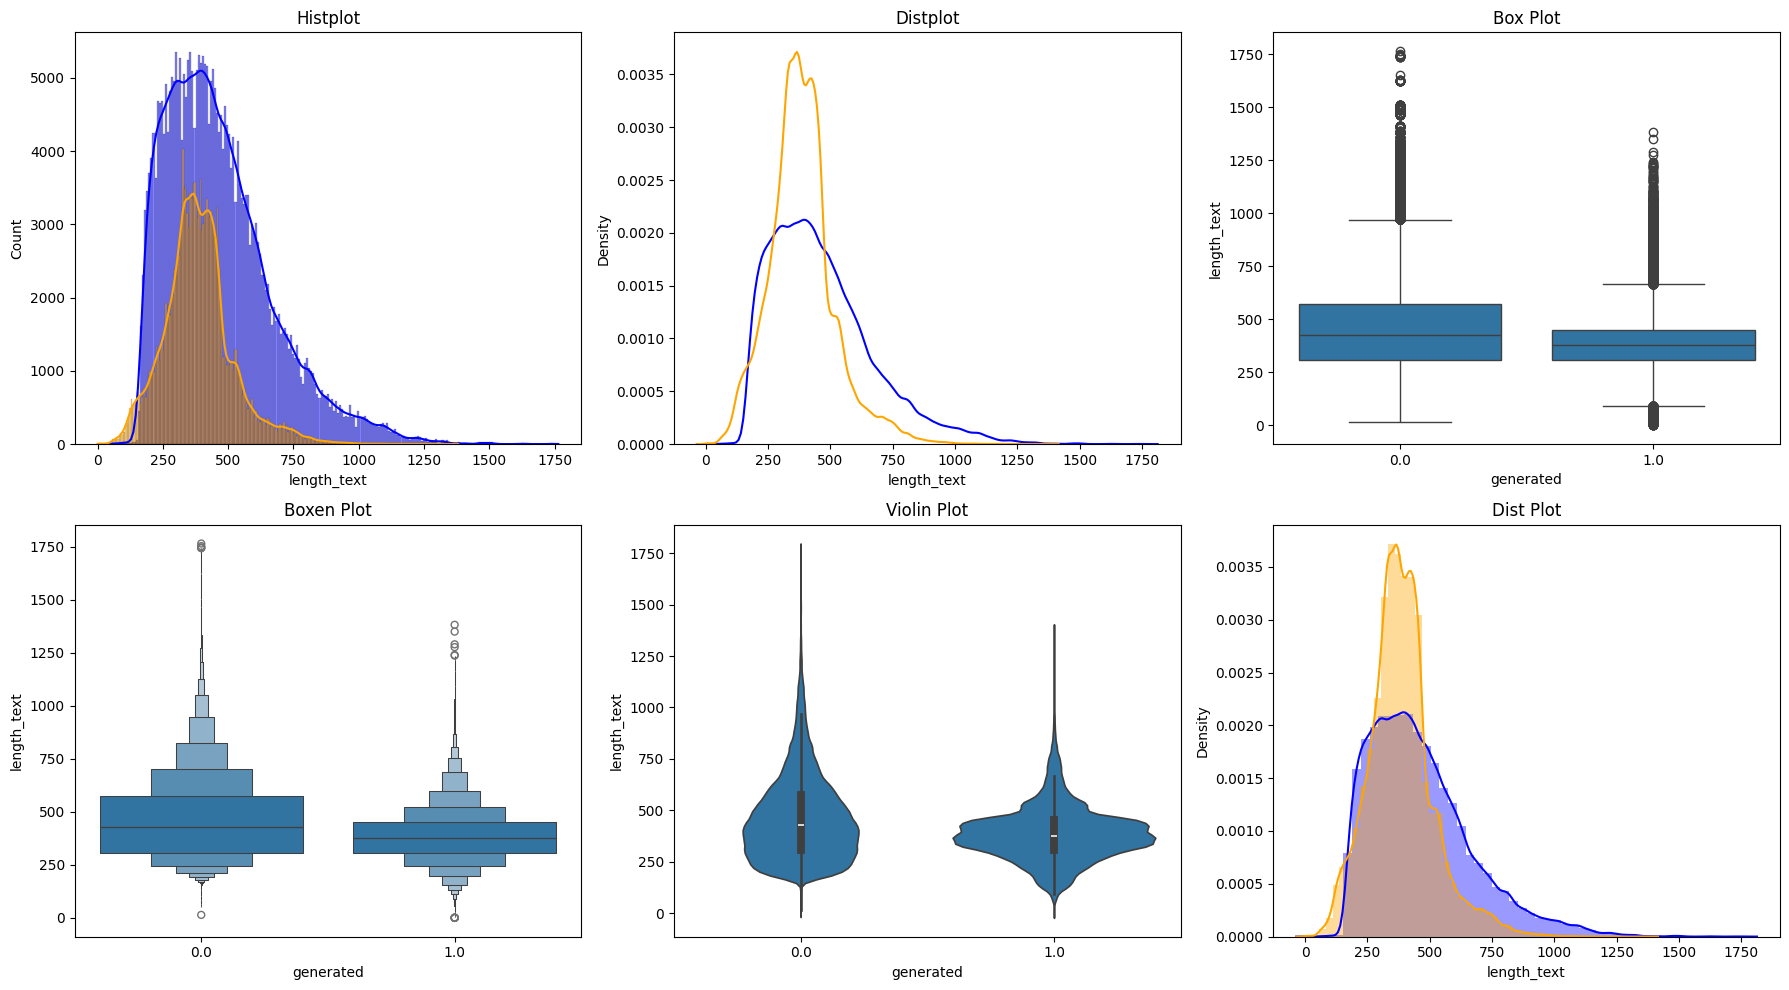

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

sns.histplot(human_txt_lengths, kde=True, color='blue', label='Human', ax=axes[0, 0])
sns.histplot(ai_txt_lengths, kde=True, color='orange', label='AI', ax=axes[0, 0])
axes[0, 0].set_title('Histplot')

sns.kdeplot(human_txt_lengths, color='blue', label='Human', ax=axes[0, 1])
sns.kdeplot(ai_txt_lengths, color='orange', label='AI', ax=axes[0, 1])
axes[0, 1].set_title('Distplot')

sns.boxplot(x='generated', y='length_text', data=df_1, ax=axes[0, 2])
axes[0, 2].set_title('Box Plot')

sns.boxenplot(x='generated', y='length_text', data=df_1, ax=axes[1, 0])
axes[1, 0].set_title('Boxen Plot')

sns.violinplot(x='generated', y='length_text', data=df_1, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot')

sns.distplot(human_txt_lengths, kde=True, color='blue', label='Human', ax=axes[1, 2])
sns.distplot(ai_txt_lengths, kde=True, color='orange', label='AI', ax=axes[1, 2])
axes[1, 2].set_title('Dist Plot')

plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save the processed DataFrame df_1 and selected columns to a pickle file
selected_columns_3 = ['length_text']

processed_data = {
    'df_p_3': df_1[selected_columns_3]
}

with open('processed_data_3.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

# ***Spell Check***

**'spelling_status' where 1 indicates correct spelling and 0 indicates incorrect spelling**

In [ ]:
import nltk
from nltk.corpus import words

nltk.download('words')
english_words = set(words.words())

# Function to check if a word is spelled correctly
def is_spelled_correctly(word):
    return word in english_words

# Initialize a list for spelling status
spelling_status_list = []

# Loop through each row in the 'text' column
for word_to_check in df_1['text']:
    if is_spelled_correctly(word_to_check):
        spelling_status_list.append(1)  # 1 for correct
    else:
        spelling_status_list.append(0)  # 0 for incorrect

# Add a new column 'spelling_status' to the DataFrame
df_1['spelling_status'] = spelling_status_list

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# Counting occurrences of each spelling status for human-written text
human_txt_status_counts = df_1[df_1['generated'] == 0]['spelling_status'].value_counts()

# Counting occurrences of each spelling status for AI-generated text
ai_txt_status_counts = df_1[df_1['generated'] == 1]['spelling_status'].value_counts()

# Print the counts
print("Human-written text:")
print("Spelling status 0 (Incorrect):", human_txt_status_counts.get(0, 0))
print("Spelling status 1 (Correct):", human_txt_status_counts.get(1, 0))
print("\nAI-generated text:")
print("Spelling status 0 (Incorrect):", ai_txt_status_counts.get(0, 0))
print("Spelling status 1 (Correct):", ai_txt_status_counts.get(1, 0))


Human-written text:
Spelling status 0 (Incorrect): 305797
Spelling status 1 (Correct): 0

AI-generated text:
Spelling status 0 (Incorrect): 181438
Spelling status 1 (Correct): 0


In [ ]:
import pickle

# Save the processed DataFrame df_1 and selected columns to a pickle file
selected_columns_4 = ['spelling_status']

processed_data = {
    'df_p_4': df_1[selected_columns_4]
}

with open('processed_data_4.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

# Check 1. POS tagger 2. name entity, 3. parser, 4. EDM 5. slangs 6. abbreviations

In [ ]:
#take a sample data from dataset
df_zeros = df[df['generated'] == 0].head(5000)
df_ones = df[df['generated'] == 1].head(5000)

In [ ]:
new_df = pd.concat([df_zeros, df_ones], ignore_index=True)

In [ ]:
df_3 = new_df.copy()

# ***POS Tagging***

In [ ]:
import pandas as pd
import spacy
import re

# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

df_3['pos_tags'] = df_3['text'].apply(pos_tagging)
df_3

,text,generated,pos_tags
0,Cars. Cars have been around since they became ...,0.0,"[(Cars, NOUN), (., PUNCT), (Cars, NOUN), (have..."
1,Transportation is a large necessity in most co...,0.0,"[(Transportation, NOUN), (is, AUX), (a, DET), ..."
2,"""America's love affair with it's vehicles seem...",0.0,"[("", PUNCT), (America, PROPN), ('s, PART), (lo..."
3,How often do you ride in a car? Do you drive a...,0.0,"[(How, SCONJ), (often, ADV), (do, AUX), (you, ..."
4,Cars are a wonderful thing. They are perhaps o...,0.0,"[(Cars, NOUN), (are, AUX), (a, DET), (wonderfu..."
...,...,...,...
9995,"Famous people are often in the public eye, and...",1.0,"[(Famous, ADJ), (people, NOUN), (are, AUX), (o..."
9996,Famous people have always been the center of a...,1.0,"[(Famous, ADJ), (people, NOUN), (have, AUX), (..."
9997,Famous people are always under the watchful ey...,1.0,"[(Famous, ADJ), (people, NOUN), (are, AUX), (a..."
9998,Celebrities have always been a subject of publ...,1.0,"[(Celebrities, NOUN), (have, AUX), (always, AD..."


***comparison of frequency of POS tags for AI & human generated texts***

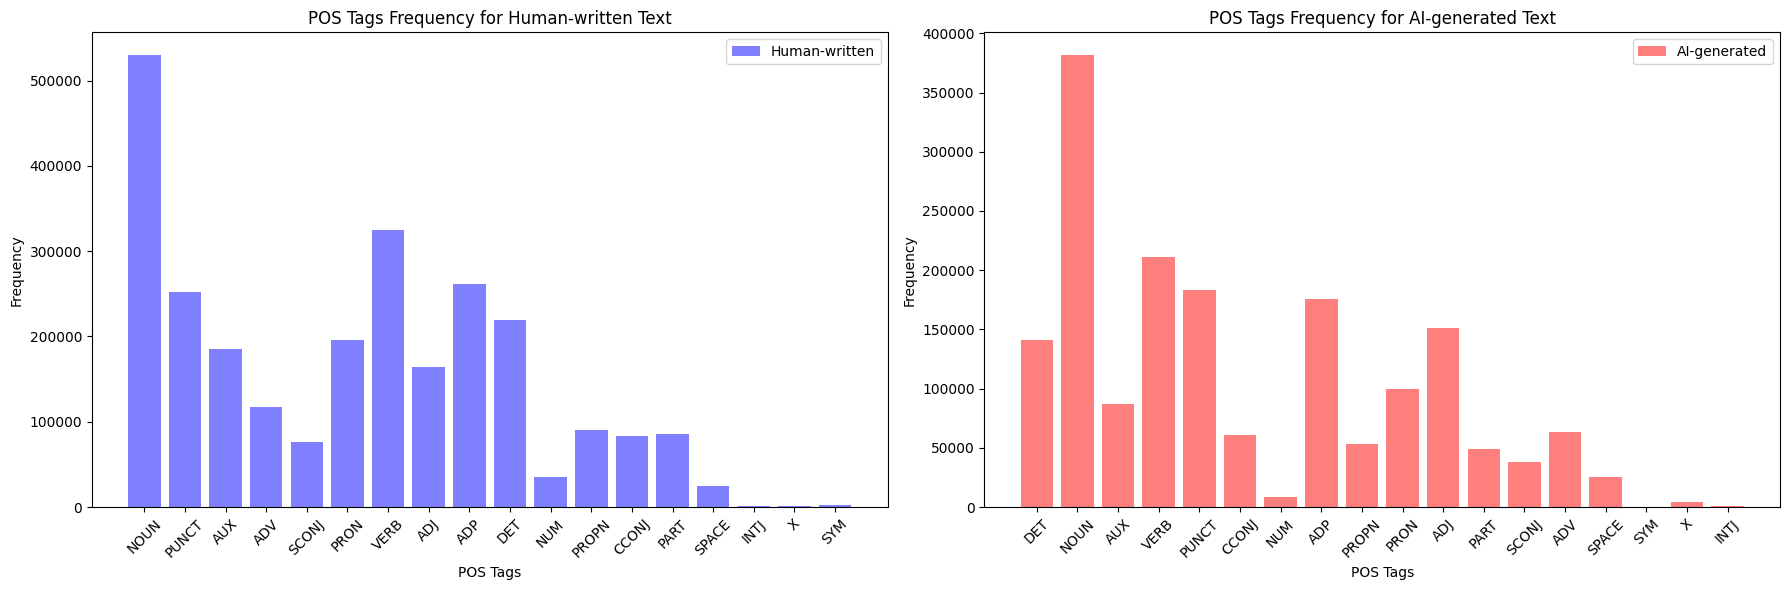

In [ ]:
import matplotlib.pyplot as plt

# Extracting POS tags for human-written and AI-generated texts
human_txt_pos_tags = df_3[df_3['generated'] == 0]['pos_tags']
ai_txt_pos_tags = df_3[df_3['generated'] == 1]['pos_tags']


# Function to calculate frequency of POS tags
def calculate_pos_tag_frequency(pos_tags):
    pos_counts = {}
    for tags in pos_tags:
        for _, pos_tag in tags:
            pos_counts[pos_tag] = pos_counts.get(pos_tag, 0) + 1
    return pos_counts

# Calculate frequency of POS tags for human-written and AI-generated texts
human_pos_tag_frequency = calculate_pos_tag_frequency(human_txt_pos_tags)
ai_pos_tag_frequency = calculate_pos_tag_frequency(ai_txt_pos_tags)

# Create subplots with separate tabs for human-written and AI-generated texts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot comparison for human-written text
ax1.bar(human_pos_tag_frequency.keys(), human_pos_tag_frequency.values(), color='blue', alpha=0.5, label='Human-written')
ax1.set_xlabel('POS Tags')
ax1.set_ylabel('Frequency')
ax1.set_title('POS Tags Frequency for Human-written Text')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot comparison for AI-generated text
ax2.bar(ai_pos_tag_frequency.keys(), ai_pos_tag_frequency.values(), color='red', alpha=0.5, label='AI-generated')
ax2.set_xlabel('POS Tags')
ax2.set_ylabel('Frequency')
ax2.set_title('POS Tags Frequency for AI-generated Text')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


* We tried to do POS tagging for whole dataset, and the session crashed after 2.5hrs

# **Named Entity Recognition (NER)**

In [ ]:
def named_entity_recognition(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df_3['named_entities'] = df_3['text'].apply(named_entity_recognition)

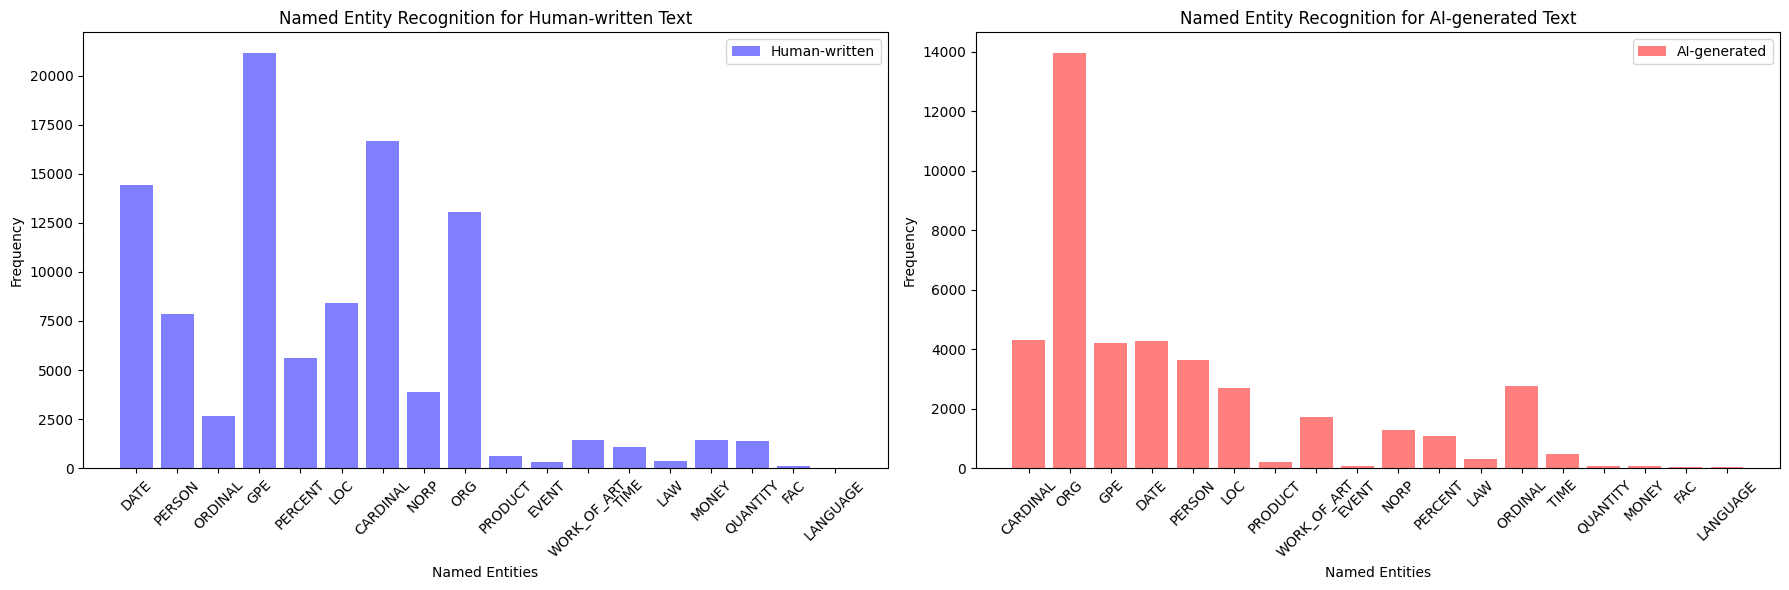

In [ ]:
import matplotlib.pyplot as plt

# Extracting named entities for human-written and AI-generated texts
human_txt_named_entities = df_3[df_3['generated'] == 0]['named_entities']
ai_txt_named_entities = df_3[df_3['generated'] == 1]['named_entities']

# Function to calculate frequency of named entities
def calculate_named_entity_frequency(named_entities):
    entity_counts = {}
    for entities in named_entities:
        for _, entity in entities:
            entity_counts[entity] = entity_counts.get(entity, 0) + 1
    return entity_counts

# Calculate frequency of named entities for human-written and AI-generated texts
human_named_entity_frequency = calculate_named_entity_frequency(human_txt_named_entities)
ai_named_entity_frequency = calculate_named_entity_frequency(ai_txt_named_entities)

# Create subplots with separate tabs for human-written and AI-generated texts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot comparison for human-written text
ax1.bar(human_named_entity_frequency.keys(), human_named_entity_frequency.values(), color='blue', alpha=0.5, label='Human-written')
ax1.set_xlabel('Named Entities')
ax1.set_ylabel('Frequency')
ax1.set_title('Named Entity Recognition for Human-written Text')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot comparison for AI-generated text
ax2.bar(ai_named_entity_frequency.keys(), ai_named_entity_frequency.values(), color='red', alpha=0.5, label='AI-generated')
ax2.set_xlabel('Named Entities')
ax2.set_ylabel('Frequency')
ax2.set_title('Named Entity Recognition for AI-generated Text')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

* We tried to do Name Entity for whole dataset, and the session crashed after 2 hrs

# **Parser (Dependency Parsing)**

In [ ]:
def dependency_parsing(text):
    doc = nlp(text)
    return [(token.text, token.dep_, token.head.text, token.head.pos_, [child for child in token.children]) for token in doc]

df_3['dependency_parsing'] = df_3['text'].apply(dependency_parsing)

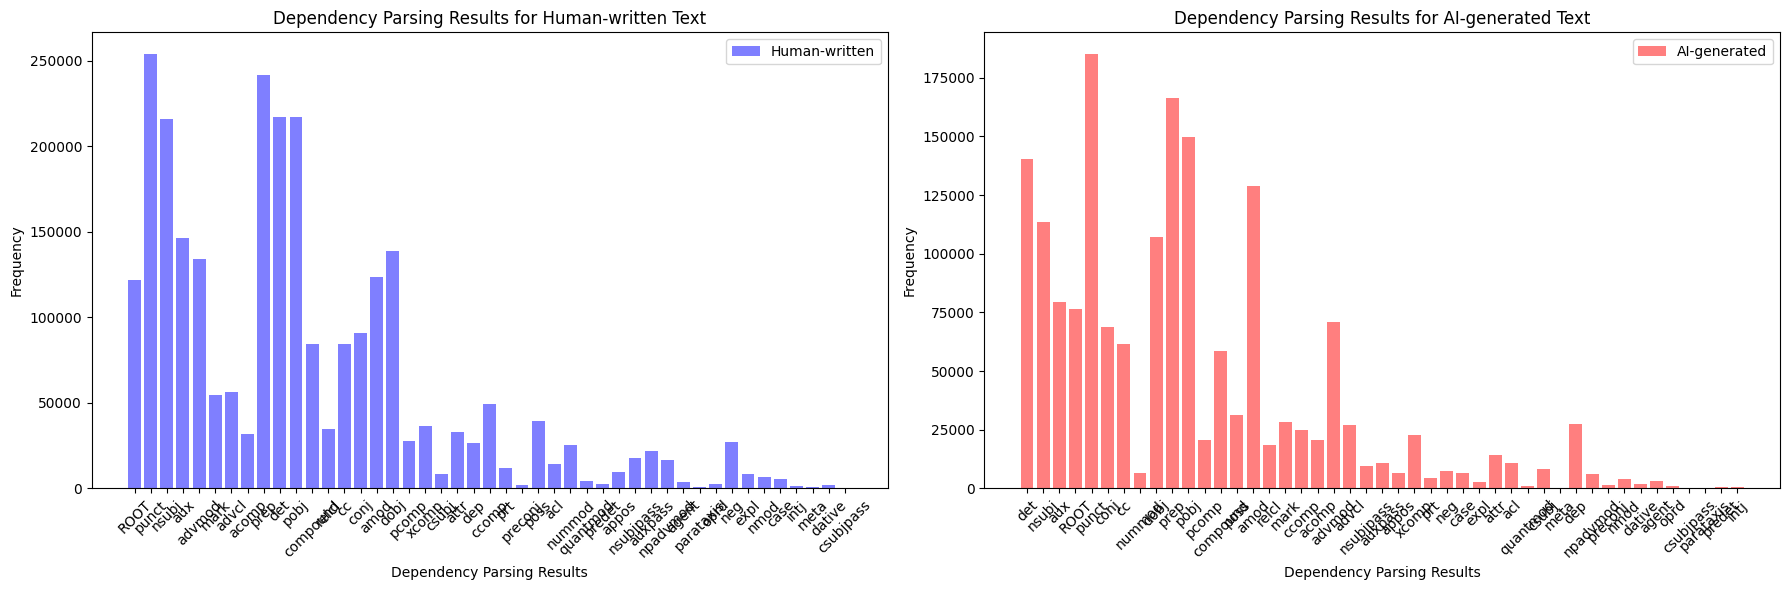

In [ ]:
import matplotlib.pyplot as plt

# Extracting dependency parsing results for human-written and AI-generated texts
human_txt_dependency_parsing = df_3[df_3['generated'] == 0]['dependency_parsing']
ai_txt_dependency_parsing = df_3[df_3['generated'] == 1]['dependency_parsing']

# Function to calculate frequency of dependency parsing results
def calculate_dependency_parsing_frequency(dependency_parsing):
    parsing_counts = {}
    for parse in dependency_parsing:
        for _, dep, _, _, _ in parse:
            parsing_counts[dep] = parsing_counts.get(dep, 0) + 1
    return parsing_counts

# Calculate frequency of dependency parsing results for human-written and AI-generated texts
human_dependency_parsing_frequency = calculate_dependency_parsing_frequency(human_txt_dependency_parsing)
ai_dependency_parsing_frequency = calculate_dependency_parsing_frequency(ai_txt_dependency_parsing)

# Create subplots with separate tabs for human-written and AI-generated texts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot comparison for human-written text
ax1.bar(human_dependency_parsing_frequency.keys(), human_dependency_parsing_frequency.values(), color='blue', alpha=0.5, label='Human-written')
ax1.set_xlabel('Dependency Parsing Results')
ax1.set_ylabel('Frequency')
ax1.set_title('Dependency Parsing Results for Human-written Text')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot comparison for AI-generated text
ax2.bar(ai_dependency_parsing_frequency.keys(), ai_dependency_parsing_frequency.values(), color='red', alpha=0.5, label='AI-generated')
ax2.set_xlabel('Dependency Parsing Results')
ax2.set_ylabel('Frequency')
ax2.set_title('Dependency Parsing Results for AI-generated Text')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


We tried to do Parser for whole dataset, and the session crashed after 2 hrs

# **Email Detection (EDM)**

In [ ]:
def email_detection(text):
    email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    return re.findall(email_regex, text, re.IGNORECASE)

df_1['emails'] = df_1['text'].apply(email_detection)

In [ ]:
# Extracting emails for human-written and AI-generated texts
human_txt_emails = df_1[df_1['generated'] == 0]['emails']
ai_txt_emails = df_1[df_1['generated'] == 1]['emails']

# Function to calculate the number of emails
def count_emails(emails):
    email_count = 0
    for email_list in emails:
        email_count += len(email_list)
    return email_count

# Calculate the number of emails for human-written and AI-generated texts
human_email_count = count_emails(human_txt_emails)
ai_email_count = count_emails(ai_txt_emails)

# Print the number of emails for each category
print("Number of emails detected in human-written texts:", human_email_count)
print("Number of emails detected in AI-generated texts:", ai_email_count)

Number of emails detected in human-written texts: 0
Number of emails detected in AI-generated texts: 7


# **Slangs Detection**

In [ ]:
def slangs_detection(text):
    slang_regex = r'\b(?:lol|brb|omg)\b'
    return re.findall(slang_regex, text, flags=re.IGNORECASE)

df_1['slangs'] = df_1['text'].apply(slangs_detection)

In [ ]:
# Extracting slangs for human-written and AI-generated texts
human_txt_slangs = df_1[df_1['generated'] == 0]['slangs']
ai_txt_slangs = df_1[df_1['generated'] == 1]['slangs']

# Function to count the number of slangs
def count_slangs(slangs):
    slang_count = 0
    for slang_list in slangs:
        slang_count += len(slang_list)
    return slang_count

# Calculate the number of slangs for human-written and AI-generated texts
human_slang_count = count_slangs(human_txt_slangs)
ai_slang_count = count_slangs(ai_txt_slangs)

# Print the number of slangs for each category
print("Number of slangs detected in human-written texts:", human_slang_count)
print("Number of slangs detected in AI-generated texts:", ai_slang_count)


Number of slangs detected in human-written texts: 590
Number of slangs detected in AI-generated texts: 233


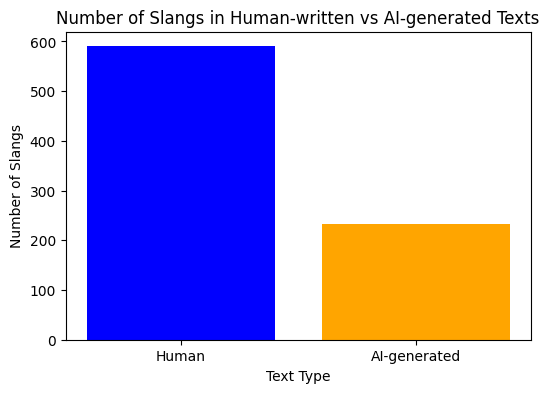

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Human', 'AI-generated']
slang_counts = [human_slang_count, ai_slang_count]

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(categories, slang_counts, color=['blue', 'orange'])
plt.xlabel('Text Type')
plt.ylabel('Number of Slangs')
plt.title('Number of Slangs in Human-written vs AI-generated Texts')
plt.show()

# **Abbreviations Detection**

In [ ]:
def abbreviations_detection(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

df_3['abbreviations'] = df_3['text'].apply(abbreviations_detection)

In [ ]:
# Extracting abbreviations for human-written and AI-generated texts
human_txt_abbreviations = df_3[df_3['generated'] == 0]['abbreviations']
ai_txt_abbreviations = df_3[df_3['generated'] == 1]['abbreviations']

# Function to count the number of abbreviations
def count_abbreviations(abbreviations):
    abbreviation_count = 0
    for abbreviation_list in abbreviations:
        abbreviation_count += len(abbreviation_list)
    return abbreviation_count

# Calculate the number of abbreviations for human-written and AI-generated texts
human_abbreviation_count = count_abbreviations(human_txt_abbreviations)
ai_abbreviation_count = count_abbreviations(ai_txt_abbreviations)

# Print the number of abbreviations for each category
print("Number of abbreviations detected in human-written texts:", human_abbreviation_count)
print("Number of abbreviations detected in AI-generated texts:", ai_abbreviation_count)


Number of abbreviations detected in human-written texts: 13049
Number of abbreviations detected in AI-generated texts: 13963


We tried to do abbreviations count  for whole dataset, and the session crashed after 2.5hrs

In [ ]:
df_1

,text,generated,punctuation_count,linking_words_count,word_count,length_text,spelling_status,emails,slangs
0,Cars. Cars have been around since they became ...,0.0,72,261,654,654,0,[],[]
1,Transportation is a large necessity in most co...,0.0,59,197,521,521,0,[],[]
2,"""Americas love affair with its vehicles seems ...",0.0,93,331,835,835,0,[],[]
3,How often do you ride in a car? Do you drive a...,0.0,112,310,793,793,0,[],[]
4,Cars are a wonderful thing. They are perhaps o...,0.0,106,389,963,963,0,[],[]
...,...,...,...,...,...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,14,91,206,206,0,[],[]
487231,The whole purpose of democracy is to create a ...,0.0,45,189,428,428,0,[],[]
487232,I firmly believe that governments worldwide sh...,1.0,56,136,417,417,0,[],[]
487233,I DFNt agree with this decision because a LFT ...,0.0,16,137,357,357,0,[],[]


In [ ]:
# # Export to CSV with index included
df_1.to_csv('formatted_dataset.csv')

In [ ]:
# Create a zip file and add the CSV file to it
import zipfile
with zipfile.ZipFile('formatted_dataset.zip', 'w') as zipf:
    zipf.write('formatted_dataset.csv', arcname='formatted_dataset.csv')

In [ ]:
import pickle
import gzip

# Save the processed DataFrame df_1 and selected columns to a compressed pickle file
selected_columns_all = ['text','generated','punctuation_count', 'linking_words_count', 'word_count', 'length_text', 'spelling_status','emails','slangs']

processed_data = {
    'df_p_all': df_1[selected_columns_all]
}

with gzip.open('processed_data_4.pkl.gz', 'wb') as f:
    pickle.dump(processed_data, f)


In [ ]:
import pickle
import gzip

# Load the compressed pickle file
with gzip.open('processed_data_4.pkl.gz', 'rb') as f:
    loaded_data = pickle.load(f)

# Extract the DataFrame from the loaded data
df_preprocessed = loaded_data['df_p_all']

# Now you can use df_p_all as your DataFrame


In [ ]:
df_preprocessed

,text,generated,punctuation_count,linking_words_count,word_count,length_text,spelling_status,emails,slangs
0,Cars. Cars have been around since they became ...,0.0,72,261,654,654,0,[],[]
1,Transportation is a large necessity in most co...,0.0,59,197,521,521,0,[],[]
2,"""Americas love affair with its vehicles seems ...",0.0,93,331,835,835,0,[],[]
3,How often do you ride in a car? Do you drive a...,0.0,112,310,793,793,0,[],[]
4,Cars are a wonderful thing. They are perhaps o...,0.0,106,389,963,963,0,[],[]
...,...,...,...,...,...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,14,91,206,206,0,[],[]
487231,The whole purpose of democracy is to create a ...,0.0,45,189,428,428,0,[],[]
487232,I firmly believe that governments worldwide sh...,1.0,56,136,417,417,0,[],[]
487233,I DFNt agree with this decision because a LFT ...,0.0,16,137,357,357,0,[],[]


In [ ]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   text                 487235 non-null  object 
 1   generated            487235 non-null  float64
 2   punctuation_count    487235 non-null  int64  
 3   linking_words_count  487235 non-null  int64  
 4   word_count           487235 non-null  int64  
 5   length_text          487235 non-null  int64  
 6   spelling_status      487235 non-null  int64  
 7   emails               487235 non-null  object 
 8   slangs               487235 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 33.5+ MB


## Feature Extraction

In [ ]:
def extract_features(text):
    # Character count
    char_count = len(text)

    # Word count
    word_count = len(text.split())

    # Average word length
    avg_word_length = sum(len(word) for word in text.split()) / word_count if word_count > 0 else 0

    # Count of uppercase letters
    uppercase_count = sum(1 for char in text if char.isupper())

    # Count of digits
    digit_count = sum(1 for char in text if char.isdigit())

    return char_count, word_count, avg_word_length, uppercase_count, digit_count

In [ ]:
# Apply feature extraction function to each text
df_preprocessed['char_count'], df_preprocessed['word_count'], df_preprocessed['avg_word_length'], df_preprocessed['uppercase_count'], df_preprocessed['digit_count'] = zip(*df_preprocessed['text'].map(extract_features))

In [ ]:
# Define the selected columns with features
selected_columns_with_features = ['text', 'generated', 'punctuation_count', 'linking_words_count', 'word_count', 'char_count', 'avg_word_length', 'uppercase_count', 'digit_count', 'length_text', 'spelling_status', 'emails', 'slangs']

# Extract the DataFrame with selected columns and features
df_with_features = df_preprocessed[selected_columns_with_features]

# Display the DataFrame
df_with_features.head()


,text,generated,punctuation_count,linking_words_count,word_count,char_count,avg_word_length,uppercase_count,digit_count,length_text,spelling_status,emails,slangs
0,Cars. Cars have been around since they became ...,0.0,72,261,584,3286,4.623288,59,13,654,0,[],[]
1,Transportation is a large necessity in most co...,0.0,59,197,462,2733,4.909091,46,16,521,0,[],[]
2,"""Americas love affair with its vehicles seems ...",0.0,93,331,744,4420,4.936828,62,0,835,0,[],[]
3,How often do you ride in a car? Do you drive a...,0.0,112,310,686,4001,4.830904,77,1,793,0,[],[]
4,Cars are a wonderful thing. They are perhaps o...,0.0,106,389,871,4694,4.386912,74,11,963,0,[],[]


In [ ]:
df_preprocessed = df_with_features.copy()
df_preprocessed.dtypes

text                    object
generated              float64
punctuation_count        int64
linking_words_count      int64
word_count               int64
char_count               int64
avg_word_length        float64
uppercase_count          int64
digit_count              int64
length_text              int64
spelling_status          int64
emails                  object
slangs                  object
dtype: object

In [ ]:
# Check if all entries in the 'emails' column are empty lists
all_empty_emails = all(len(x) == 0 for x in df_with_features['emails'])

print("All entries in 'emails' column are empty lists:", all_empty_emails)

All entries in 'emails' column are empty lists: False


In [ ]:
# Printing unique values in the 'emails' and 'slangs' columns
unique_emails = df_with_features['emails'].apply(lambda x: tuple(x) if isinstance(x, list) else x).unique()
unique_slangs = df_with_features['slangs'].apply(lambda x: tuple(x) if isinstance(x, list) else x).unique()

print("Unique values (as tuples) in 'emails' column:", unique_emails)
print("Unique values (as tuples) in 'slangs' column:", unique_slangs)

Unique values (as tuples) in 'emails' column: [() ('lastname123@gmail.com',) ('lastaame123@gmail.com',)]
Unique values (as tuples) in 'slangs' column: [() ('OMG',) ('Lol',) ('omg',) ('LOL',) ('lol',) ('omg', 'omg')
 ('lol', 'lol', 'lol') ('loL',) ('BRB', 'BRB', 'BRB') ('BRB',)
 ('OMG', 'OMG', 'OMG', 'OMG', 'OMG') ('lol', 'lol') ('OMG', 'OMG')
 ('BRB', 'BRB', 'BRB', 'BRB', 'BRB', 'BRB', 'BRB')
 ('lol', 'lol', 'lol', 'lol', 'lol', 'lol', 'lol')
 ('BRB', 'BRB', 'BRB', 'BRB', 'BRB') ('loL', 'loL')
 ('loL', 'loL', 'loL', 'loL') ('BRB', 'BRB') ('LoL',)
 ('loL', 'loL', 'loL')
 ('loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL', 'loL')
 ('lol', 'OMG', 'omg') ('BRB', 'BRB', 'BRB', 'BRB') ('LoL', 'LoL', 'LoL')
 ('lol', 'lol', 'lol', 'lol', 'lol')
 ('BRB', 'BRB', 'BRB', 'BRB', 'BRB', 'BRB', 'BRB', 'BRB')
 ('lol', 'lol', 'lol', 'lol')]


In [ ]:
# Correctly transform the 'slangs' column: replace non-empty lists with 1, and empty lists or non-list values with 0
df_with_features['slangs'] = df_with_features['slangs'].apply(lambda x: 1 if isinstance(x, list) and len(x) > 0 else 0)

In [ ]:
# Correctly transform the 'slangs' column: replace non-empty lists with 1, and empty lists or non-list values with 0
df_with_features['emails'] = df_with_features['emails'].apply(lambda x: 1 if isinstance(x, list) and len(x) > 0 else 0)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the text data to obtain the TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df_with_features['text'])

# Convert the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the existing features DataFrame
df_with_features = pd.concat([df_with_features, tfidf_df], axis=1)

# Now df_with_features contains both the original features and the TF-IDF features

In [ ]:
df_with_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Columns: 1013 entries, text to yourself
dtypes: float64(1002), int64(10), object(1)
memory usage: 3.7+ GB


In [ ]:
df_with_features.head()

,text,generated,punctuation_count,linking_words_count,word_count,char_count,avg_word_length,uppercase_count,digit_count,length_text,...,year,years,yes,yet,you,young,younger,your,youre,yourself
0,Cars. Cars have been around since they became ...,0.0,72,261,584,3286,4.623288,59,13,654,...,0.029511,0.0,0.000000,0.0,0.029870,0.0,0.0,0.000000,0.000000,0.000000
1,Transportation is a large necessity in most co...,0.0,59,197,462,2733,4.909091,46,16,521,...,0.079240,0.0,0.000000,0.0,0.020051,0.0,0.0,0.025658,0.000000,0.000000
2,"""Americas love affair with its vehicles seems ...",0.0,93,331,744,4420,4.936828,62,0,835,...,0.000000,0.0,0.064513,0.0,0.037781,0.0,0.0,0.048346,0.000000,0.000000
3,How often do you ride in a car? Do you drive a...,0.0,112,310,686,4001,4.830904,77,1,793,...,0.000000,0.0,0.000000,0.0,0.139953,0.0,0.0,0.179088,0.068659,0.036997
4,Cars are a wonderful thing. They are perhaps o...,0.0,106,389,871,4694,4.386912,74,11,963,...,0.000000,0.0,0.000000,0.0,0.042882,0.0,0.0,0.082310,0.000000,0.000000


Dropping text column in order to reduce size of pickle file

In [ ]:
# Create a new DataFrame without the 'text' column
df_without_text = df_with_features.drop(columns=['text'])


In [ ]:
import pickle
import gzip

# Save the DataFrame with extracted features to a new compressed pickle file
with gzip.open('final_processed_data_1.pkl.gz', 'wb') as f:
    pickle.dump(df_without_text, f)


# **Start from here 🔽**
Upload the given pickle file final_processed_data_1.pkl.gz
and run below code

In [ ]:
import pickle
import gzip

In [ ]:
# Load the compressed pickle file with the final processed data
with gzip.open('final_processed_data_1.pkl.gz', 'rb') as f:
    final_processed_data = pickle.load(f)

# Now final_processed_data contains our DataFrame with all the features


In [ ]:
df_with_features=final_processed_data
df_with_features.head()

,generated,punctuation_count,linking_words_count,word_count,char_count,avg_word_length,uppercase_count,digit_count,length_text,spelling_status,...,year,years,yes,yet,you,young,younger,your,youre,yourself
0,0.0,72,261,584,3286,4.623288,59,13,654,0,...,0.029511,0.0,0.000000,0.0,0.029870,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,59,197,462,2733,4.909091,46,16,521,0,...,0.079240,0.0,0.000000,0.0,0.020051,0.0,0.0,0.025658,0.000000,0.000000
2,0.0,93,331,744,4420,4.936828,62,0,835,0,...,0.000000,0.0,0.064513,0.0,0.037781,0.0,0.0,0.048346,0.000000,0.000000
3,0.0,112,310,686,4001,4.830904,77,1,793,0,...,0.000000,0.0,0.000000,0.0,0.139953,0.0,0.0,0.179088,0.068659,0.036997
4,0.0,106,389,871,4694,4.386912,74,11,963,0,...,0.000000,0.0,0.000000,0.0,0.042882,0.0,0.0,0.082310,0.000000,0.000000


# **Normalization of data**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df_with_features)

normalized_features

array([[-0.77027804,  1.22592838,  0.91373822, ..., -0.50472696,
        -0.20599746, -0.190371  ],
       [-0.77027804,  0.66957789,  0.1554478 , ..., -0.03145033,
        -0.20599746, -0.190371  ],
       [-0.77027804,  2.12464839,  1.74311836, ...,  0.38705354,
        -0.20599746, -0.190371  ],
       ...,
       [ 1.29823252,  0.54118932, -0.56729775, ..., -0.50472696,
        -0.20599746, -0.190371  ],
       [-0.77027804, -1.17065833, -0.55544946, ..., -0.50472696,
        -0.20599746, -0.190371  ],
       [-0.77027804, -0.78549261, -0.36587686, ..., -0.50472696,
        -0.20599746, -0.190371  ]])

In [ ]:
normalized_features.shape

(487235, 1011)

# **Introducing PCA to reduce dimension of dataset**

In [ ]:
import pandas as pd

# Step 2: Apply PCA
# Define the number of components you want to keep
n_components = 200

# Apply PCA
pca = PCA(n_components=n_components)
pca.fit(normalized_features)

# Transform the data to its principal components
principal_components = pca.transform(normalized_features)

# Update the dataframe with the principal components
df_with_pca = pd.DataFrame(principal_components, columns=[f"PC{i}" for i in range(1, n_components + 1)])

In [ ]:
df_with_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
0,4.625756,-6.139121,-8.183926,-1.584481,0.898296,-0.745829,1.233761,-2.972068,1.018547,1.531250,...,-0.792867,0.592858,0.422301,0.835457,1.464719,-0.104244,1.001682,0.216649,0.407391,-0.430058
1,8.425920,-6.755080,-7.253139,-1.888090,0.496328,-0.949115,2.146534,-4.172021,1.647835,2.783770,...,0.599653,2.219176,1.953602,1.491739,-0.537354,1.725558,1.439251,0.268123,1.514510,0.637347
2,5.188977,-6.241041,-2.800961,-1.448331,1.135069,-0.518902,0.916541,-1.691716,2.567332,-0.722073,...,-0.655248,-0.949802,-0.882912,0.389224,0.282645,-0.538652,1.104475,-0.863450,0.560406,-0.575510
3,4.845310,-7.421351,-6.481223,-2.967532,0.678225,1.111468,1.775790,-1.344532,3.140376,-0.408148,...,0.139977,-0.887881,0.292654,-0.513490,0.659874,0.923782,1.119892,-2.126562,-0.276688,-0.407697
4,4.480856,-6.581754,-8.503830,-3.141797,0.163962,-0.153618,1.306802,-4.705047,2.998410,0.101185,...,0.451199,-0.652226,-1.255350,-0.537535,-0.332195,1.657600,-0.542583,1.016093,1.414892,1.157998


In [ ]:
df_with_pca.shape

(487235, 200)

In [ ]:
# Concatenate the 'generated' column with the principal components dataframe

df_combined = pd.concat([df_with_features['generated'], df_with_pca], axis=1)

In [ ]:
df_combined.head()

,generated,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
0,0.0,4.625756,-6.139121,-8.183926,-1.584481,0.898296,-0.745829,1.233761,-2.972068,1.018547,...,-0.792867,0.592858,0.422301,0.835457,1.464719,-0.104244,1.001682,0.216649,0.407391,-0.430058
1,0.0,8.425920,-6.755080,-7.253139,-1.888090,0.496328,-0.949115,2.146534,-4.172021,1.647835,...,0.599653,2.219176,1.953602,1.491739,-0.537354,1.725558,1.439251,0.268123,1.514510,0.637347
2,0.0,5.188977,-6.241041,-2.800961,-1.448331,1.135069,-0.518902,0.916541,-1.691716,2.567332,...,-0.655248,-0.949802,-0.882912,0.389224,0.282645,-0.538652,1.104475,-0.863450,0.560406,-0.575510
3,0.0,4.845310,-7.421351,-6.481223,-2.967532,0.678225,1.111468,1.775790,-1.344532,3.140376,...,0.139977,-0.887881,0.292654,-0.513490,0.659874,0.923782,1.119892,-2.126562,-0.276688,-0.407697
4,0.0,4.480856,-6.581754,-8.503830,-3.141797,0.163962,-0.153618,1.306802,-4.705047,2.998410,...,0.451199,-0.652226,-1.255350,-0.537535,-0.332195,1.657600,-0.542583,1.016093,1.414892,1.157998


In [ ]:
df_combined.shape

(487235, 201)

In [ ]:
import pickle
import gzip

# Save the DataFrame with PCA extracted features to a new compressed pickle file
with gzip.open('PCA_features_data.pkl.gz', 'wb') as f:
    pickle.dump(df_combined, f)